<a href="https://colab.research.google.com/github/vimal-139/Global-Terrerosim---EDA/blob/main/Python_Capstone_Project_GTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Global Terrorism Analysis

# **Introduction**
### **Terrorism is a form of violence that seeks to achieve political, ideological, or religious goals through the use of fear, intimidation, and violence. It is a global problem that affects people from all walks of life and all parts of the world. While acts of terrorism have been committed throughout history, the term "terrorism" has become more widely used since the 1970s to describe a specific type of violent activity.**



## **Explore and analyze the data to discover results and statistics for different terrorist attacks across the world.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/Global Terrorism Data.csv"
gt_df = pd.read_csv(path , encoding="ISO-8859-1")



In [6]:
gt_df.head().T

,0,1,2,3,4
eventid,197000000001,197000000002,197001000001,197001000002,197001000003
iyear,1970,1970,1970,1970,1970
imonth,7,0,1,1,1
iday,2,0,0,0,0
approxdate,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
INT_LOG,0,0,-9,-9,-9
INT_IDEO,0,1,-9,-9,-9
INT_MISC,0,1,1,1,1
INT_ANY,0,1,1,1,1


In [7]:
gt_df.tail().T

,181686,181687,181688,181689,181690
eventid,201712310022,201712310029,201712310030,201712310031,201712310032
iyear,2017,2017,2017,2017,2017
imonth,12,12,12,12,12
iday,31,31,31,31,31
approxdate,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
INT_LOG,0,-9,0,-9,-9
INT_IDEO,0,-9,0,-9,-9
INT_MISC,0,1,0,0,0
INT_ANY,0,1,0,-9,-9


In [8]:
gt_df.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region

# **Understanding the Data**

In [9]:
gt_df.shape


(181691, 135)

In [15]:
gt_df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [16]:
#Renaming the columns
gt_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                   'region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude',
                   'attacktype1_txt':'AttackType','targtype1_txt':'TargetType','targsubtype1_txt':'TargetSubType',
                   'weaptype1_txt':'WeaponType','gname':'Group','nkill':'Killed','nwound':'Wounded','summary':'Summary','motive':'Motive'},inplace=True)

In [18]:
#Extracting Necessary Columns
gt_df=gt_df[['eventid','Year','Month','Day','Country','State','Region','City','Latitude','Longitude','AttackType','TargetType','TargetSubType'
       ,'suicide','Killed','Wounded','Summary','Group','WeaponType','Motive','success','multiple']]

In [19]:
#Seeing First few Entries
gt_df.head()

,eventid,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,...,TargetSubType,suicide,Killed,Wounded,Summary,Group,WeaponType,Motive,success,multiple
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,Named Civilian,0,1.0,0.0,NaN,MANO-D,Unknown,NaN,1,0.0
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,...,"Diplomatic Personnel (outside of embassy, cons...",0,0.0,0.0,NaN,23rd of September Communist League,Unknown,NaN,1,0.0
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,...,Radio Journalist/Staff/Facility,0,1.0,0.0,NaN,Unknown,Unknown,NaN,1,0.0
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,...,Embassy/Consulate,0,NaN,NaN,NaN,Unknown,Explosives,NaN,1,0.0
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,...,Embassy/Consulate,0,NaN,NaN,NaN,Unknown,Incendiary,NaN,1,0.0


In [20]:
gt_df.describe()

,eventid,Year,Month,Day,Latitude,Longitude,suicide,Killed,Wounded,success,multiple
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,171378.000000,165380.000000,181691.000000,181690.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.036507,2.403272,3.167668,0.889598,0.137773
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.187549,11.545741,35.949392,0.313391,0.344663
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,0.000000,2.000000,2.000000,1.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000,1.000000,1.000000


# **Performing Data Analysis**

## Number of Global Attacks per year

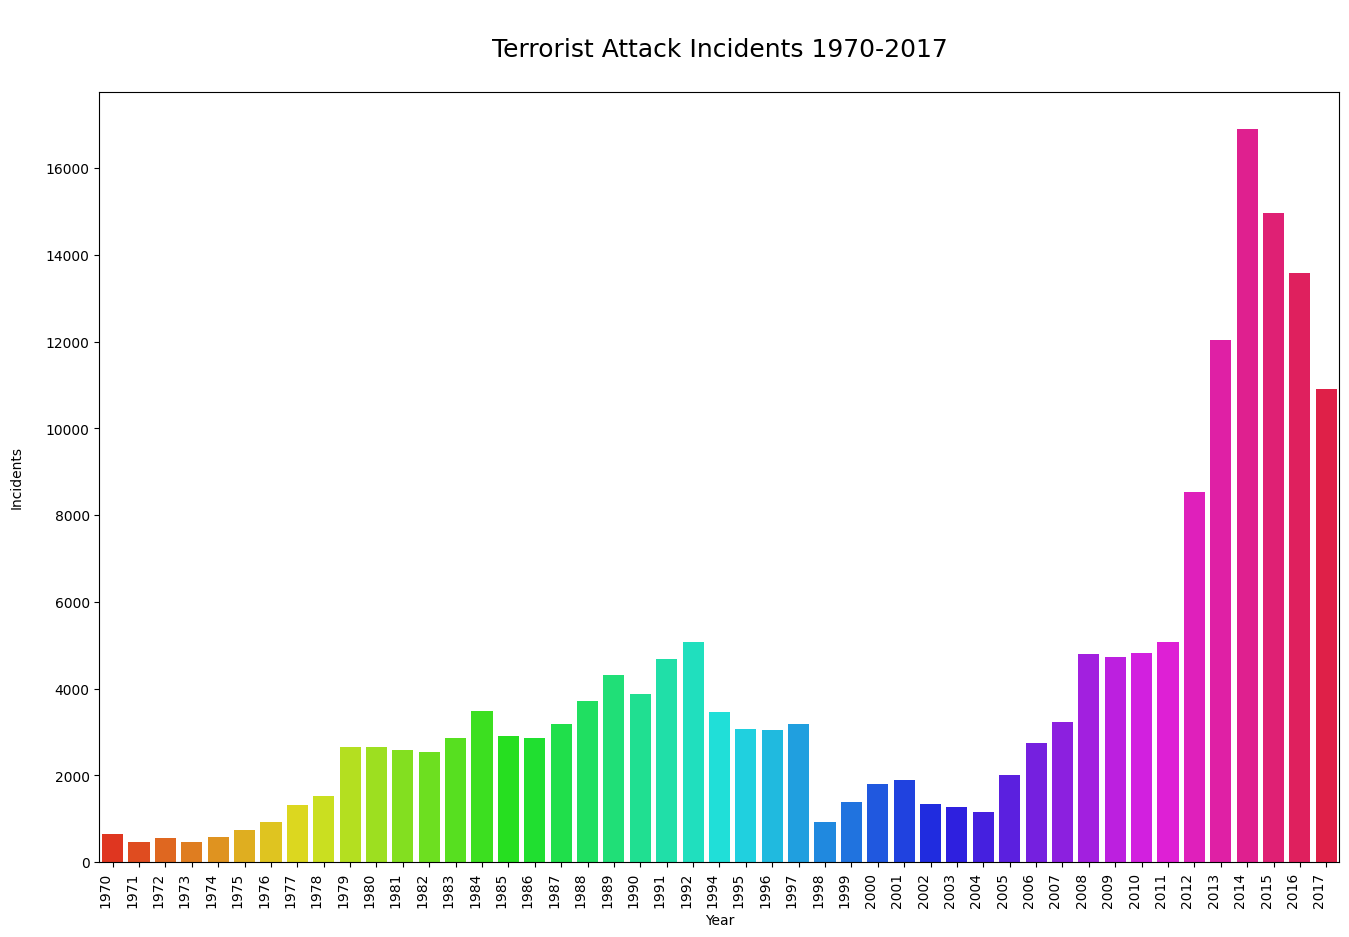

In [47]:
# Create a figure with a size of 15x10 inches
fig, ax = plt.subplots(figsize=(16, 10))

# Create a countplot of terrorist attacks per year using the 'Year' column of 'gta_df'
sns.countplot(x='Year', data=gt_df, palette='hsv', color='blue', ax=ax)

# Rotate and align the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Set the title and y-axis label of the plot
ax.set_title('\nTerrorist Attack Incidents 1970-2017\n', size=18)
ax.set_ylabel('Incidents\n')

# Show the plot
plt.show()


We can observe from this bar graph that there is a sharp increase in terrorist attacks after 1978, and after that there is somewhat mixed level of increment and decrement till 2010 but after that there is an exponential type of growth in the terrorist attacks which reached its peak in 2014.

## **Types of Terrorist Attack**

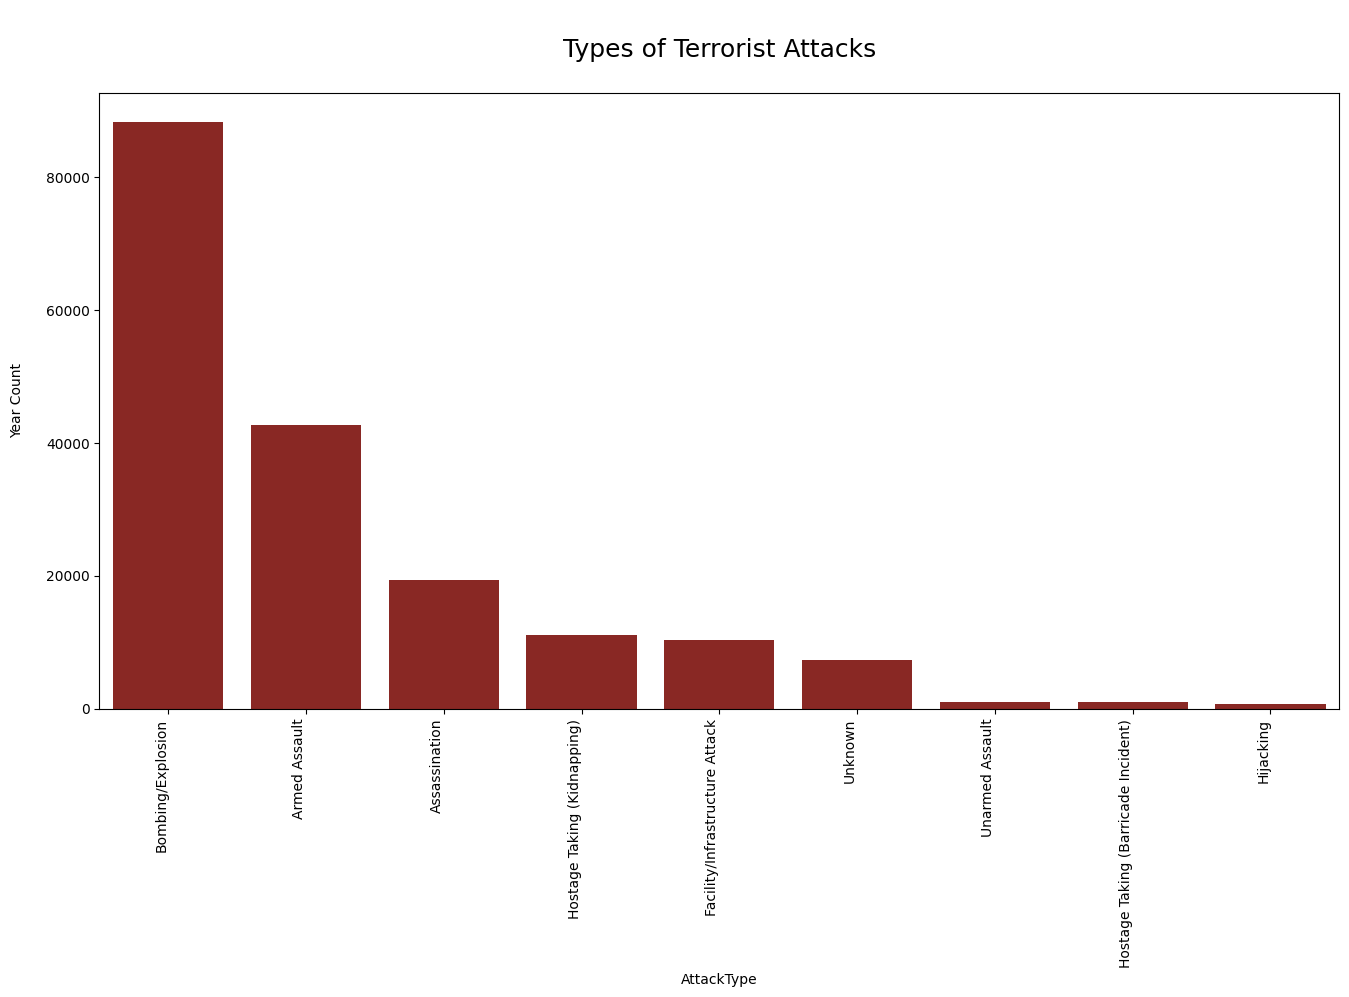

In [85]:
# Define the custom color for the countplot
custom_color = '#9a1913'

# Create a figure with a size of 15x10 inches
fig, ax = plt.subplots(figsize=(16, 8))

# Create a countplot of terrorist attack types using the 'AttackType' column of 'gta_df'
sns.countplot(x='AttackType', data=gt_df, palette=[custom_color], 
              order=gt_df['AttackType'].value_counts().index, ax=ax)

# Rotate and align the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Set the title and y-axis label of the plot
ax.set_title('\nTypes of Terrorist Attacks\n', size=18)
ax.set_ylabel('Year Count\n')

# Show the plot
plt.show()


So, as we know that bombing is the most easy method to wreak havoc at a place and which is also evident from this graph that terrorists have done most number of bombing attacks followed by Armed Assault and Assassination and since they need a lot of planning and also the success rate of pulling of Hijacking successfully is low and hence terrorist have preffered Hijacking least which is also evident from the graph.

## **Global bombings**

In [86]:
gt_df_bombing = gt_df[gt_df['AttackType'] == 'Bombing/Explosion']

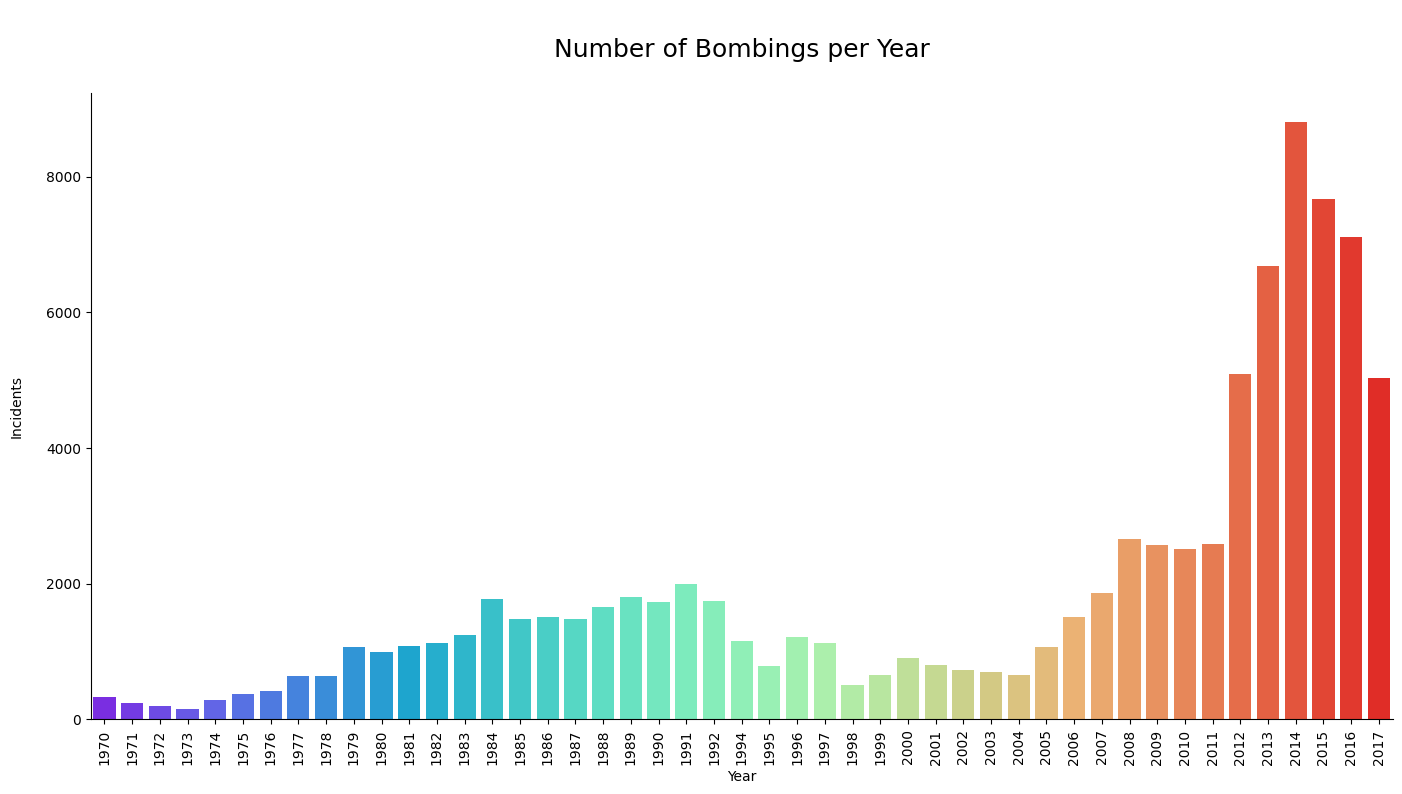

In [87]:
# Create a countplot of bombings per year using Seaborn's catplot function
sns.catplot(x='Year', data=gt_df_bombing, kind='count', height=7, aspect=2, palette='rainbow')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and y-axis label of the plot
plt.title('\nNumber of Bombings per Year\n', size=18)
plt.ylabel('Incidents\n')

# Show the plot
plt.show()

We can analyse here from this graph that the number of bombings follow a mixed trend of increment and decrement till 2011, but after that there is an exponential growth in the bombings till 2017 which achieves its peak in 2014.

## **Attacks by Region**

Text(0, 0.5, 'Number of Attacks')

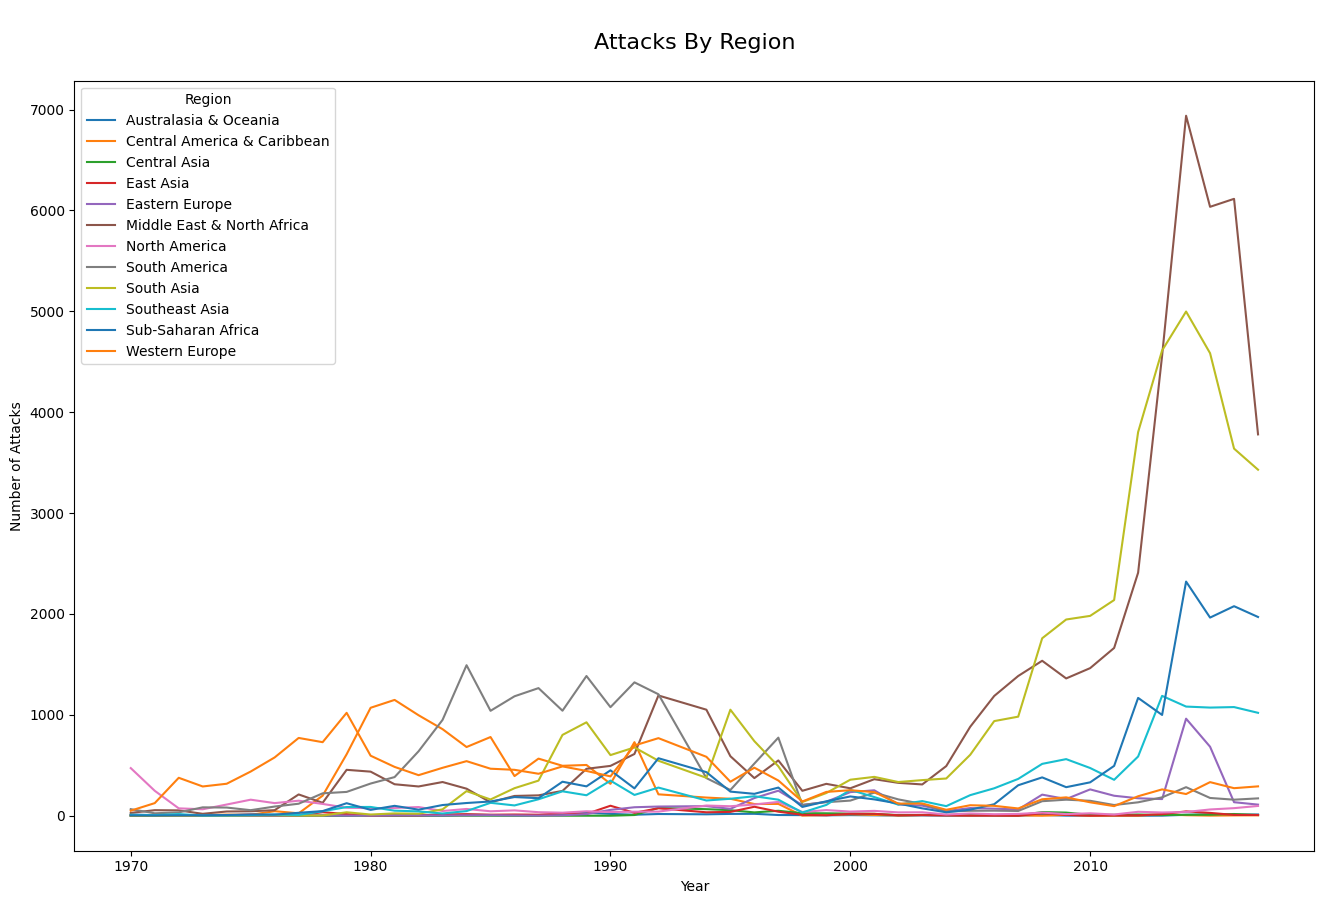

In [88]:
pd.crosstab(gt_df.Year,gt_df.Region).plot(figsize=(16,10))
plt.title('\nAttacks By Region\n',size=16)
plt.ylabel('Number of Attacks')


Here we can observe from this graph that there is a mix trend in number of attack in nearly every country but the graph takes an exponential growth since 2003 , and also we can analyse that the most vulnerable countries has been Middle East and North Africa followed by South Asia

## **Target Type of Plot**

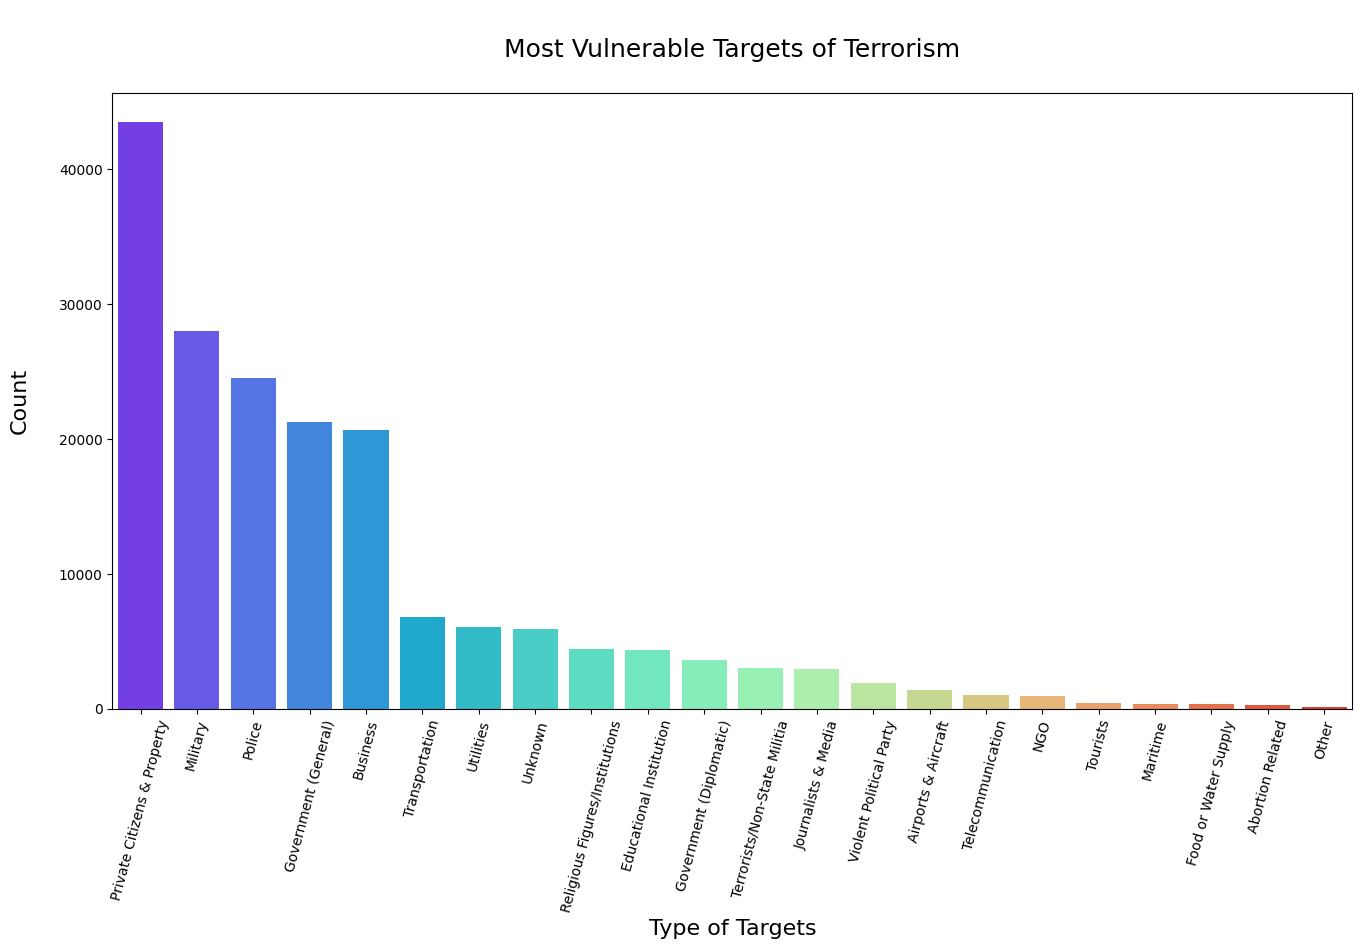

In [89]:
# Set the figure size using plt.figure(figsize=(width, height))
plt.figure(figsize=(16, 8))

# Create the countplot with custom order
ax = sns.countplot(x='TargetType', data=gt_df, order=gt_df['TargetType'].value_counts().index, palette='rainbow')

# Set x-axis label and rotate x-axis labels for better readability
ax.set_xlabel('Type of Targets', fontsize=16)
plt.xticks(rotation=75)

# Set y-axis label and plot title
ax.set_ylabel('Count\n', fontsize=16)
ax.set_title('\nMost Vulnerable Targets of Terrorism\n', fontsize=18)

# Show the plot
plt.show()

We can analyse from this bar graph that the most vulnerable are Private Citizens and Properties followed by Military and Police that is also evident from the fact that miltary and police are most exposed and have the responsibility to handle any type of attack.

## **Number of Terrorist Attacks in each Country**


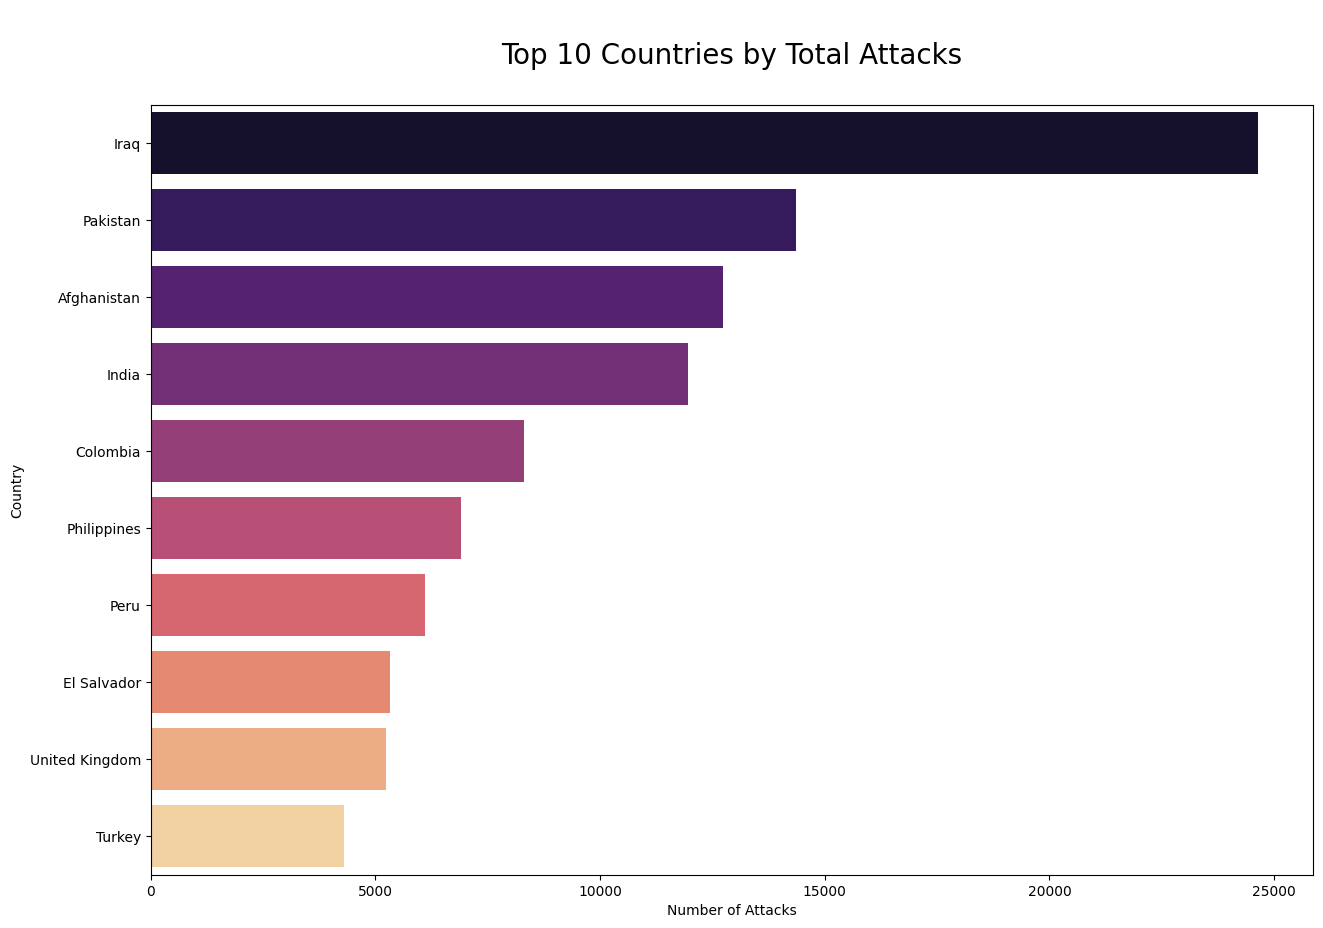

In [80]:
# Set the figure size using plt.figure(figsize=(width, height))
plt.figure(figsize=(15, 10))

# Create a bar plot using sns.barplot
sns.barplot(x=gt_df['Country'].value_counts().values[0:10], y=gt_df['Country'].value_counts()[0:10].index, palette='magma')

# Set x-axis and y-axis labels, and plot title
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.title('\nTop 10 Countries by Total Attacks\n', size=20)

# Show the plot
plt.show()


We can Analyse from this graph that the most vulnerable countries to terrorist attacks are Iraq and Pakistan followed by Afganistan and India and the least vulnerable Country is Turkey.
We can also analyse that nearly no country is left from these attacks Pakistan which is blamed everytime for giving shelter to the terrorists is also not spared by these attacks so we can say that Terrorism is not good for any country .

## **Number of attacks by Type of Organisation**

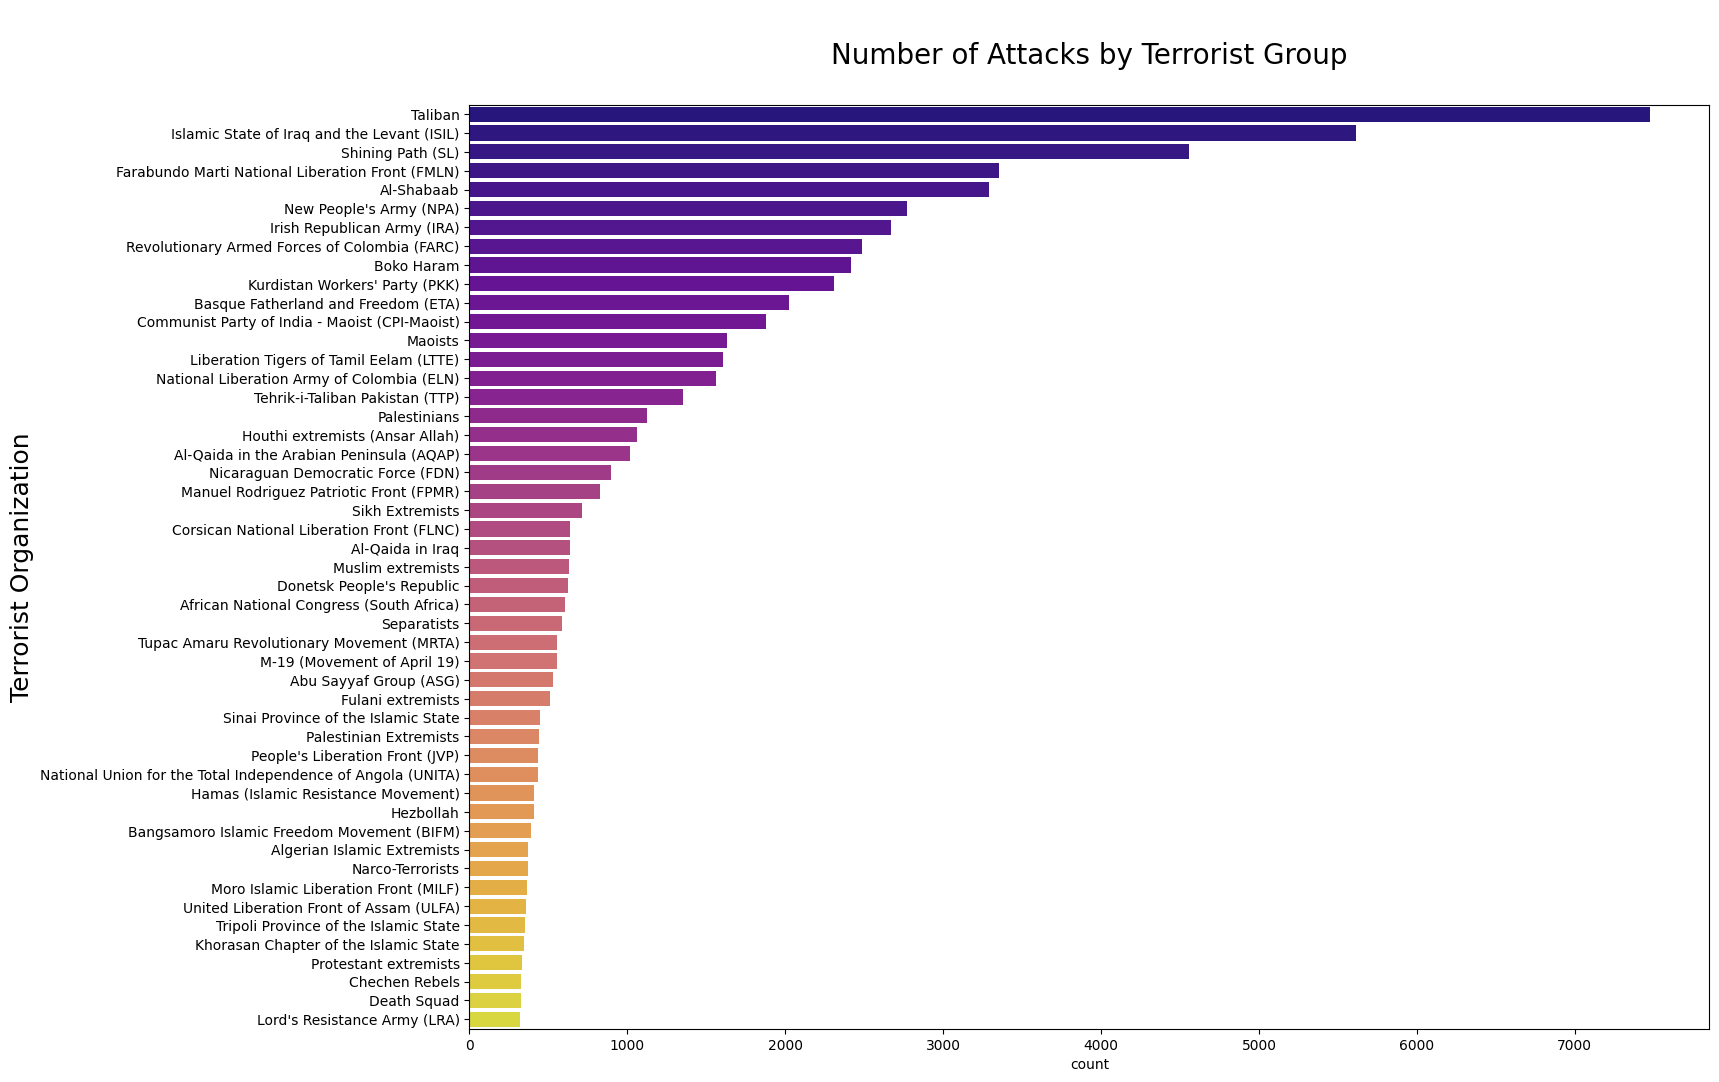

In [90]:
# Set the size of the figure
plt.rcParams['figure.figsize'] = 16, 12

# Create a countplot of terrorist groups
group_counts = gt_df['Group'].value_counts()[1:50]
ax = sns.countplot(y='Group', data=gt_df, order=group_counts.index, palette='plasma')

# Customize the plot
ax.set_ylabel('Terrorist Organization', fontsize=18)
ax.set_title('\nNumber of Attacks by Terrorist Group\n', fontsize=20)

# Show the plot
plt.show()

Hence we can analyse from this graph that the most number of terrorist attacks are done by Taliban which is followed by ISIL and SL so all the countries sercret agencies should have a close look on  the activities of these organisations in order to avoid future attacks.

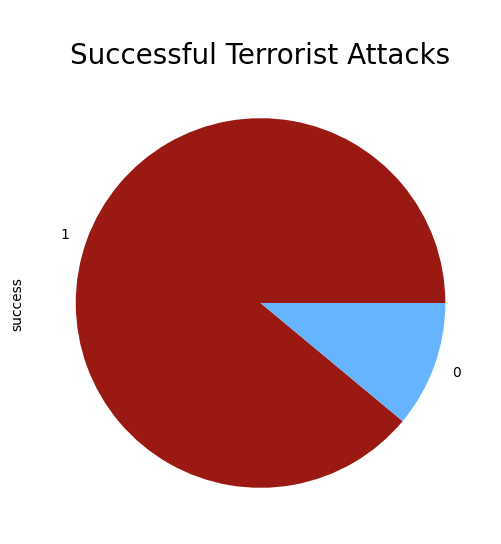

In [102]:
# Define colors for the pie chart
colors = [ '#9a1913','#66b3ff']

# Define size of the pie chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create a pie chart of successful terrorist attacks
success_counts = gt_df['success'].value_counts()
ax = success_counts.plot(kind='pie', colors=colors)

# Customize the plot
ax.set_title('\nSuccessful Terrorist Attacks', fontsize=20)

# Show the plot
plt.show()